Copyright (C) 2020 Edouard Fouché

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU Affero General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU Affero General Public License for more details.

You should have received a copy of the GNU Affero General Public License
along with this program. If not, see <http://www.gnu.org/licenses/>.

In [1]:
import math

import matplotlib as mpl
from matplotlib import cm
mpl.rcParams['text.usetex'] = True 
mpl.rc('font', **{'family': 'serif', 'serif': ['Times']})

import numpy as np
import pandas as pd
import seaborn as sns
import copy

import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler

mpl.rcParams['ps.usedistiller'] = 'xpdf' 
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999
pd.options.display.max_columns = None
cmap = cm.get_cmap('RdBu')

In [2]:
data = pd.read_csv("runtime.csv") # we reported the runtime measure in .csv file beforehand

In [3]:
d = data.set_index("Data")
d = d.stack().reset_index()
d.columns = [0,1,2]
data = d

In [4]:
data[1].unique()

array(['kj-NN', 'LOF', 'RS-Hash', 'ANC', 'K-ANCS', 'TONMF', 'VMF-Q',
       'CVDD', 'W-CNN', 'VD-CNN', 'ATT-RNN', 'RCNN'], dtype=object)

In [5]:
data[0].unique()

array(['NYT-1', 'NYT-2', 'NYT-5', 'NYT-50', 'NYT-20', 'NYT-10'], dtype=object)

In [6]:
approaches = ['kj-NN', 'LOF', 'RS-Hash', 'ANC', 'K-ANCS', 'TONMF', 'VMF-Q', 'CVDD',
       'W-CNN', 'VD-CNN', 'ATT-RNN', 'RCNN']

In [7]:
datasets = ['NYT-1', 'NYT-2', 'NYT-5', 'NYT-50', 'NYT-20', 'NYT-10']

In [8]:
barss = [list(data[data[1] == a][2]) for a in approaches]

In [9]:
data = data.fillna(1000000)

In [10]:
data[1] = data[1].replace("KJ-NN", "kj-NN")
data[1] = data[1].replace("K-ANC", "k-ANCS")
data[1] = data[1].replace("ANC", "ANCS")

<IPython.core.display.Javascript object>


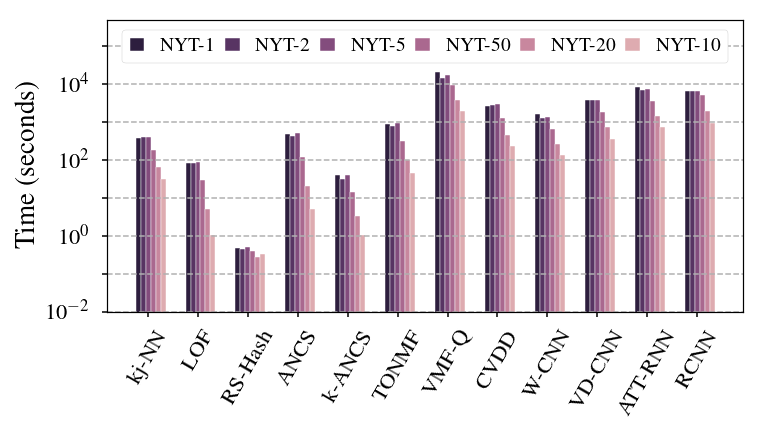

In [11]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,4), sharex=True, sharey="row")

approaches = ['kj-NN', 'LOF', 'RS-Hash', 'ANCS', 'k-ANCS', 'TONMF', 'VMF-Q', "CVDD",
       'W-CNN', 'VD-CNN', 'ATT-RNN', 'RCNN']
datasets = ['NYT-1', 'NYT-2', 'NYT-5', 'NYT-50', 'NYT-20', 'NYT-10']
barWidth = 0.1

barss = [list(data[data[0] == d][2]) for d in datasets]

rs = [np.arange(len(barss[0]))]
for x in barss[1::]:
    rs = rs + [[x + barWidth for x in rs[-1]]] 
    
cmap = sns.cubehelix_palette(7, reverse=True)

for i in range(len(barss)):
    plt.bar(rs[i], barss[i], color=cmap[i], width=barWidth, edgecolor='white', label=datasets[i])
    
plt.xticks([r + barWidth*2 for r in range(len(barss[0]))], approaches)

plt.yscale("log")
plt.ylabel("Time (seconds)", fontsize=18)
plt.legend(ncol=6, fontsize=13, columnspacing=0.5, handlelength=0.75, framealpha=1, loc="upper center")
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000], ["$10^{-2}$", "", "$10^0$", "", "$10^2$", "", "$10^4$", "", "$10^6$"])
plt.ylim(0.01,500000)

plt.grid(axis="y", linestyle="--")

plt.xticks(rotation=60)

plt.show()
plt.tight_layout()
plt.savefig('plots/Figure5.pdf', bbox_inches = "tight")